In [1]:
import scanpy as sc
import graph_tool.all as gt
import scnsbm
import pandas as pd
import anndata
import mygene
import pickle
import scipy.stats
%pylab
%matplotlib inline

/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/draw/cairo_draw.py:39: RuntimeWarning: Error importing cairo. Graph drawing will not work.
  warnings.warn(msg, RuntimeWarning)
/home/morelli/anaconda3/envs/scrna/lib/python3.7/site-packages/graph_tool/all.py:40: RuntimeWarning: Error im

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


# 10x

In [35]:
adatam_10x=sc.read('state_adata/10XV3_minimize.h5ad')
adatae_10x=sc.read('state_adata/10XV3_equilibrate.h5ad')

EQUILIBRATE 10x


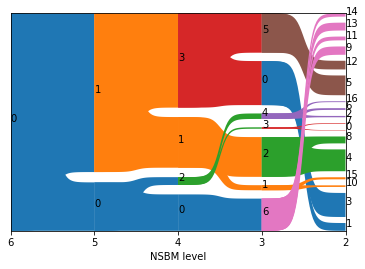

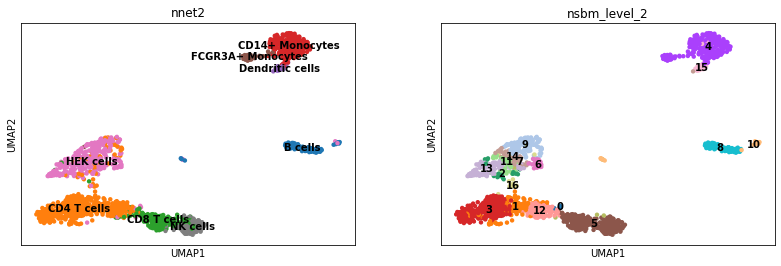

In [3]:
adatae = scnsbm.io.read('state_adata/10XV3_equilibrate')
print('EQUILIBRATE 10x')
scnsbm.pl.alluvial(adatae,level_end=6, level_start=2)
sc.pl.umap(adatae_10x, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')

In [36]:
adatam_10x2=sc.read('state_adata/10XV3_minimize2.h5ad')
adatae_10x2=sc.read('state_adata/10XV3_equilibrate2.h5ad')

EQUILIBRATE 10x2


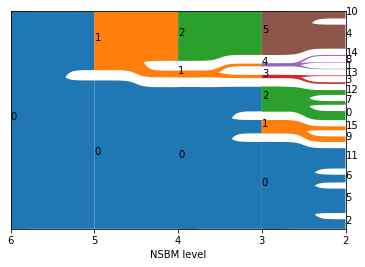

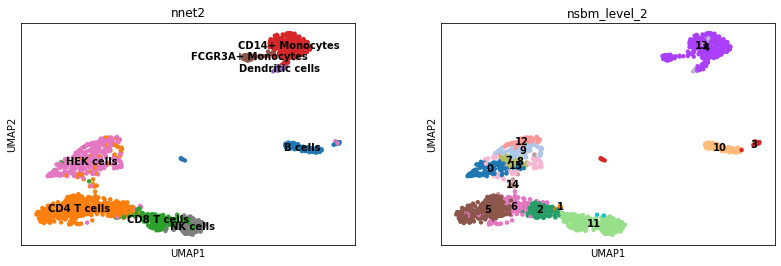

In [5]:
adatae2 = scnsbm.io.read('state_adata/10XV3_equilibrate2')
print('EQUILIBRATE 10x2')
scnsbm.pl.alluvial(adatae2,level_end=6, level_start=2)
sc.pl.umap(adatae_10x2, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')

In [37]:
adatam_10x3=sc.read('state_adata/10XV3_minimize3.h5ad')
adatae_10x3=sc.read('state_adata/10XV3_equilibrate3.h5ad')

EQUILIBRATE 10x3


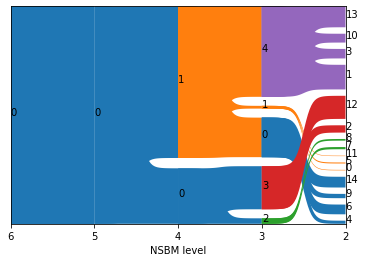

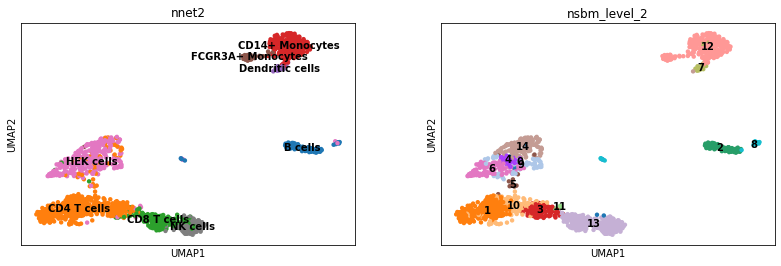

In [7]:
adatae3 = scnsbm.io.read('state_adata/10XV3_equilibrate3')
print('EQUILIBRATE 10x3')
scnsbm.pl.alluvial(adatae3,level_end=6, level_start=2)
sc.pl.umap(adatae_10x3, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')

### Equilibrate 10x:
##### B cell e megacariociti si uniscono sempre prima di unirsi ad altro
##### Poi spesso si uniscono tcell e hek, e poi tutti i due rami insieme
##### a volte capita che a b e megacariociti si unisca unano tcell e poi tutto si unisca alle hek

MINIMIZE 10x


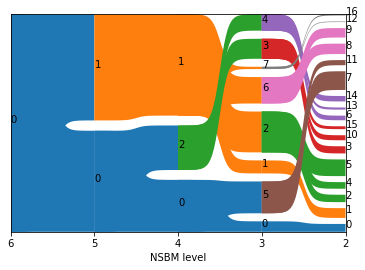

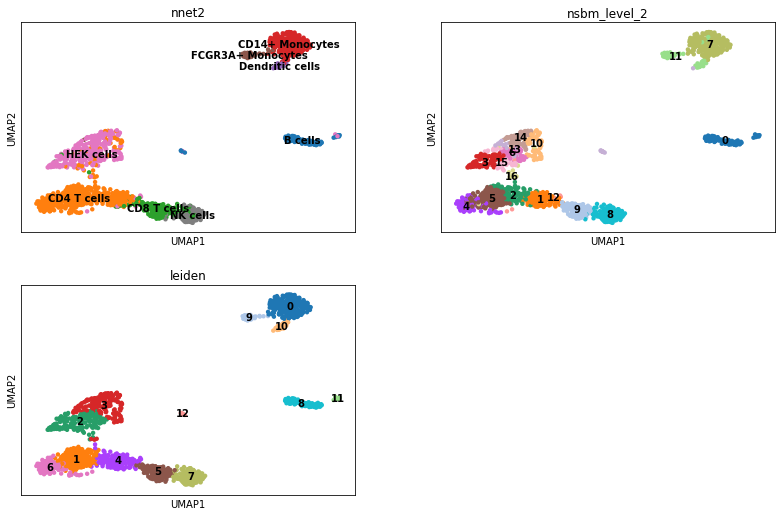

In [8]:
adatam = scnsbm.io.read('state_adata/10XV3_minimize')
print('MINIMIZE 10x')
scnsbm.pl.alluvial(adatam,level_end=6, level_start=2)
sc.pl.umap(adatam_10x, color=['nnet2', 'nsbm_level_2','leiden'], ncols=2, legend_loc='on data')

MINIMIZE 10x2


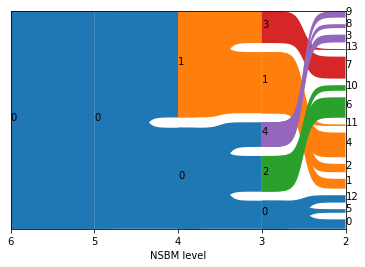

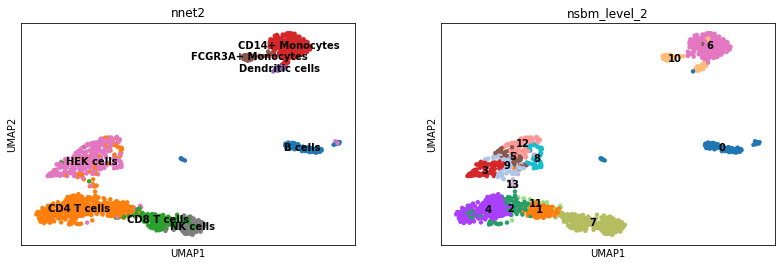

In [9]:
adatam2 = scnsbm.io.read('state_adata/10XV3_minimize2')
print('MINIMIZE 10x2')
scnsbm.pl.alluvial(adatam2,level_end=6, level_start=2)
sc.pl.umap(adatam_10x2, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')

MINIMIZE 10x3


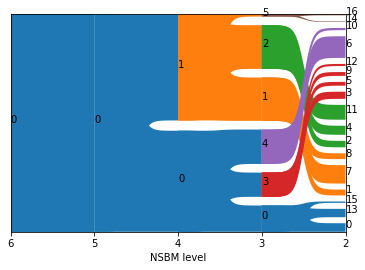

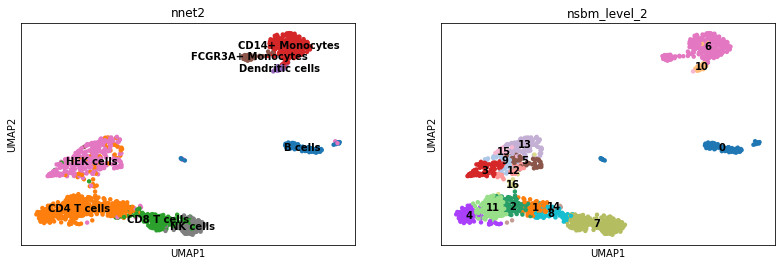

In [10]:
adatam3 = scnsbm.io.read('state_adata/10XV3_minimize3')
print('MINIMIZE 10x3')
scnsbm.pl.alluvial(adatam3,level_end=6, level_start=2)
sc.pl.umap(adatam_10x3, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')

### Minimize 10x
###### con il minimize c'è una parte delle hek che si unisce alle bcells 
###### poi tutte insieme si uniscono ai megacariociti
###### infine le t cell si uniscono alle altre cellule

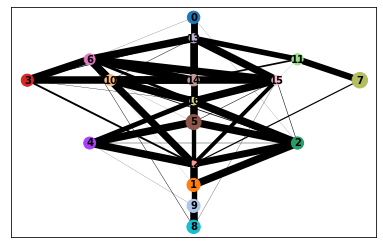

In [70]:
sc.tl.paga(adatam_10x,groups='nsbm_level_2')
sc.pl.paga(adatam_10x, color=['nsbm_level_2'], layout='eq_tree')

In [71]:
import networkx as nx
G=nx.from_numpy_matrix(adatam_10x.uns['paga']['connectivities_tree'].todense())

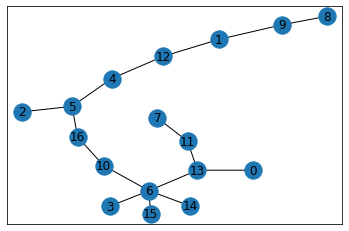

In [72]:
nx.draw_networkx(G)

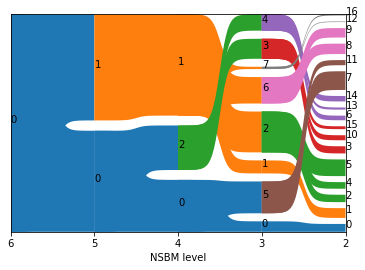

In [74]:
scnsbm.pl.alluvial(adatam_10x,level_end=6, level_start=2)

In [75]:
import scipy.cluster

In [82]:
M=adatam_10x.uns['paga']['connectivities'].todense().A1.reshape((17,17))

In [85]:
Mc=scipy.spatial.distance.squareform(M)

In [93]:
cluster=scipy.cluster.hierarchy.ward(1-Mc)

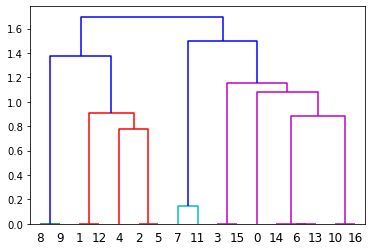

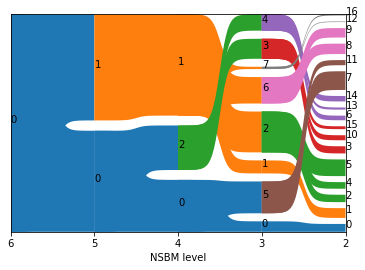

In [94]:
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatam_10x,level_end=6, level_start=2)

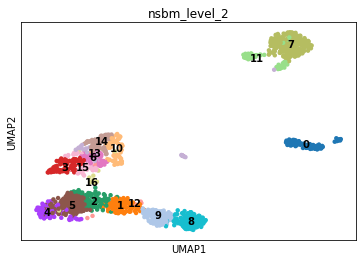

In [89]:
sc.pl.umap(adatam_10x,color=['nsbm_level_2'],legend_loc='on data')

In [73]:
adatam_10x.obs['nnet2'].cat.categories

Index(['B cells', 'CD4 T cells', 'CD8 T cells', 'CD14+ Monocytes',
       'Dendritic cells', 'FCGR3A+ Monocytes', 'HEK cells', 'NK cells'],
      dtype='object')

### gerarchia paga leiden vs gerarchia nsbm minimize

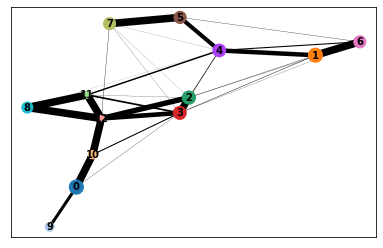

In [38]:
sc.tl.paga(adatam_10x, groups='leiden')
sc.pl.paga(adatam_10x, color=['leiden'])

In [40]:
import networkx as nx
G=nx.from_numpy_matrix(adatam_10x.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatam_10x.uns['paga']['connectivities'].todense().A1.reshape((13,13))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

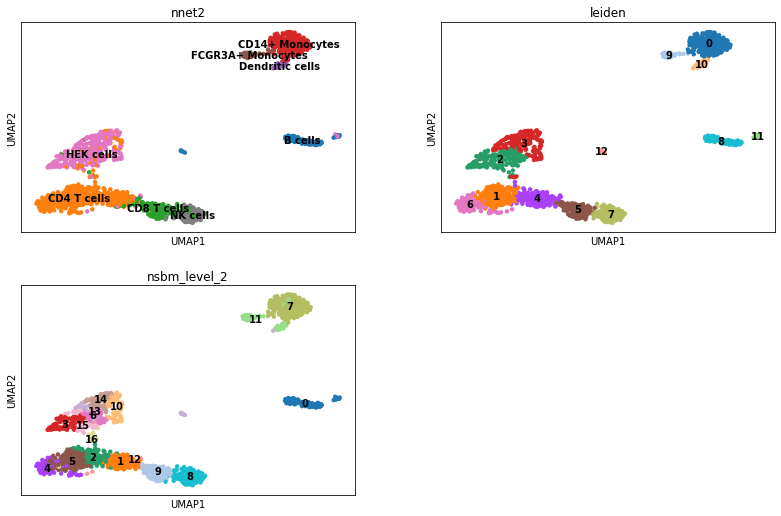

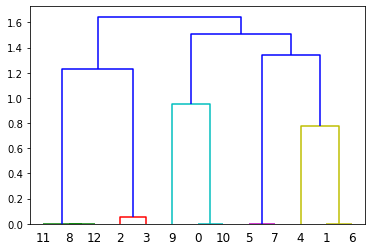

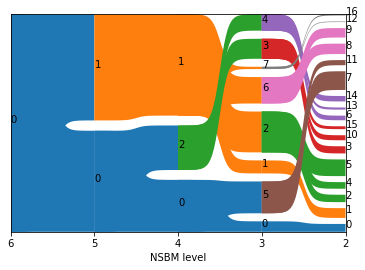

In [41]:
sc.tl.leiden(adatam_10x, resolution=1.0)
sc.pl.umap(adatam_10x, color=['nnet2','leiden', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatam_10x,level_end=6, level_start=2)

### gerarchia paga nsbm vs gerarchia nsbm minimize

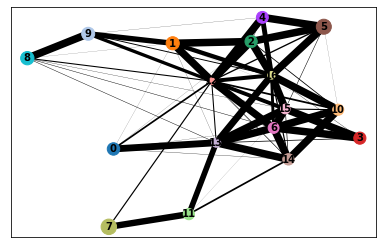

In [49]:
sc.tl.paga(adatam_10x, groups='nsbm_level_2')
sc.pl.paga(adatam_10x, color=['nsbm_level_2'])

In [51]:
import networkx as nx
G=nx.from_numpy_matrix(adatam_10x.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatam_10x.uns['paga']['connectivities'].todense().A1.reshape((17,17))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

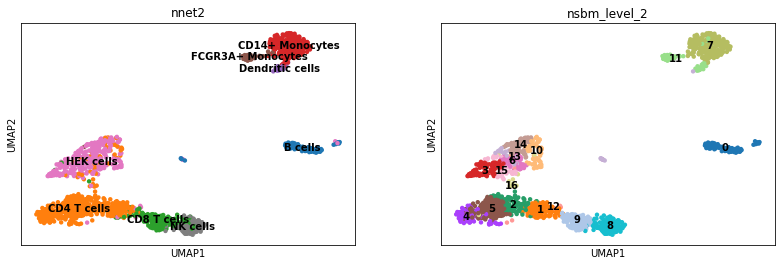

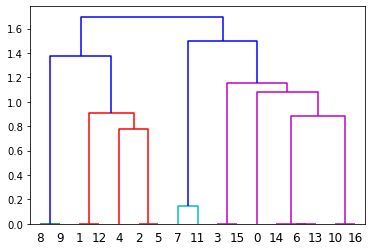

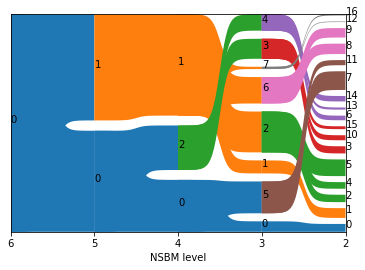

In [52]:
sc.tl.leiden(adatam_10x, resolution=1.0)
sc.pl.umap(adatam_10x, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatam_10x,level_end=6, level_start=2)

### gerarchia paga leiden vs gerarchia nsbm equilibrate

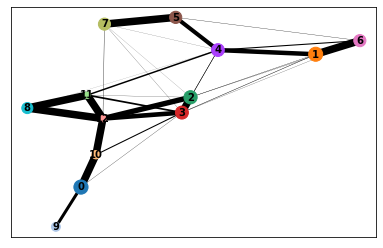

In [46]:
sc.tl.paga(adatae_10x, groups='leiden')
sc.pl.paga(adatae_10x, color=['leiden'])

In [47]:
import networkx as nx
G=nx.from_numpy_matrix(adatae_10x.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatae_10x.uns['paga']['connectivities'].todense().A1.reshape((13,13))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

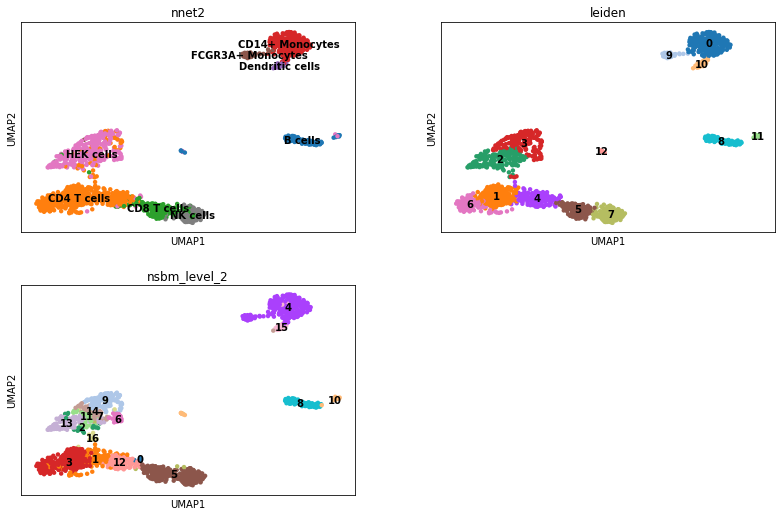

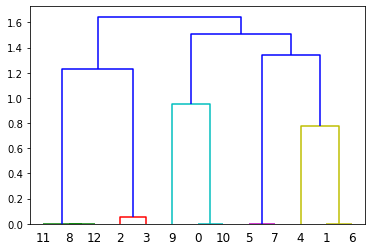

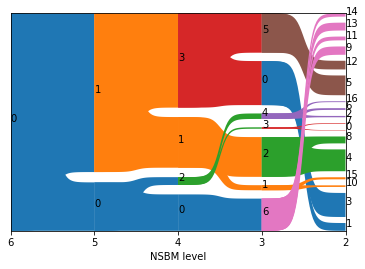

In [48]:
sc.tl.leiden(adatae_10x, resolution=1.0)
sc.pl.umap(adatae_10x, color=['nnet2', 'leiden','nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatae_10x,level_end=6, level_start=2)

### gerarchia nsbm leiden vs gerarchia nsbm equilibrate

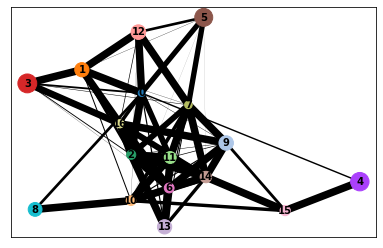

In [53]:
sc.tl.paga(adatae_10x, groups='nsbm_level_2')
sc.pl.paga(adatae_10x, color=['nsbm_level_2'])

In [54]:
import networkx as nx
G=nx.from_numpy_matrix(adatae_10x.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatae_10x.uns['paga']['connectivities'].todense().A1.reshape((17,17))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

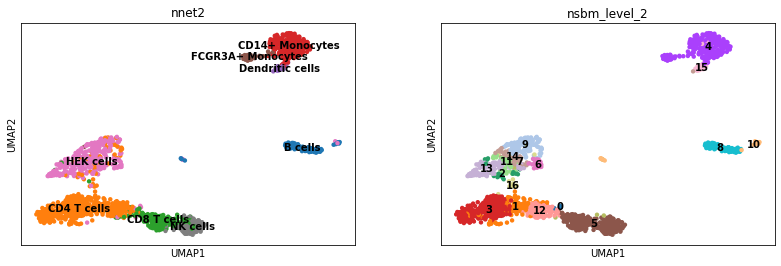

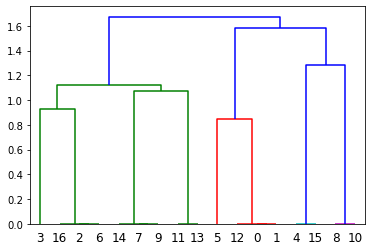

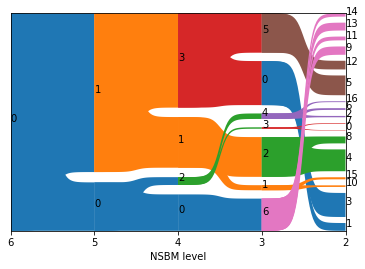

In [55]:
sc.tl.leiden(adatae_10x, resolution=1.0)
sc.pl.umap(adatae_10x, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatae_10x,level_end=6, level_start=2)

con 10x leiden + paga funziona peggio di nsbm da solo perchè la prima cosa che connette sono le hek con le b cell, poi i megacariociti con le b cell. inoltre le stesse incongruenze si notano anche se vengono paragonati nsbm da solo e nsbm+ paga

# quartzseq

In [3]:
adatam_Quartzseq=sc.read('state_adata/Quartzseq_minimize.h5ad')
adatae_Quartzseq=sc.read('state_adata/Quartzseq_equilibrate.h5ad')

EQUILIBRATE Quartzseq


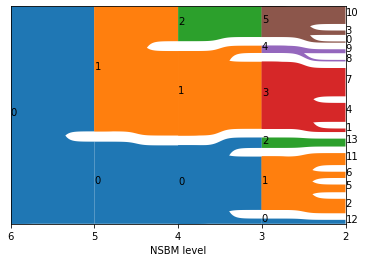

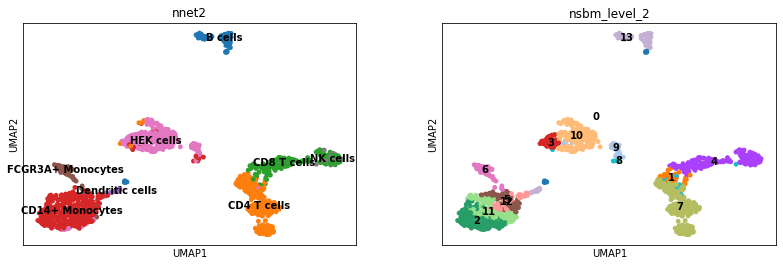

In [13]:
adatae = scnsbm.io.read('state_adata/Quartzseq_equilibrate')
print('EQUILIBRATE Quartzseq')
scnsbm.pl.alluvial(adatae,level_end=6, level_start=2)
sc.pl.umap(adatae_Quartzseq, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')

##### b cell a megacariociti 
##### t cell a hek
##### poi tutto insieme

In [4]:
adatam_Quartzseq2=sc.read('state_adata/Quartzseq_minimize2.h5ad')
adatae_Quartzseq2=sc.read('state_adata/Quartzseq_equilibrate2.h5ad')

EQUILIBRATE Quartzseq2


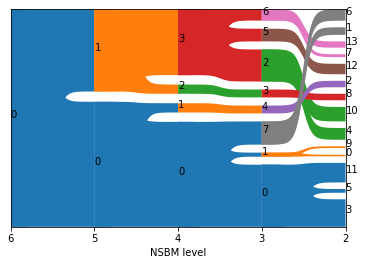

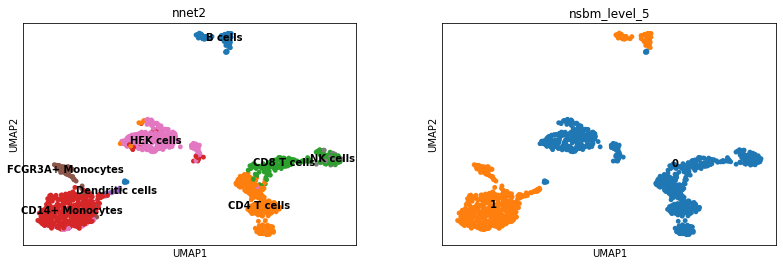

In [15]:
adatae2 = scnsbm.io.read('state_adata/Quartzseq_equilibrate2')
print('EQUILIBRATE Quartzseq2')
scnsbm.pl.alluvial(adatae2,level_end=6, level_start=2)
sc.pl.umap(adatae_Quartzseq2, color=['nnet2', 'nsbm_level_5'], ncols=2, legend_loc='on data')

In [5]:
adatam_Quartzseq3=sc.read('state_adata/Quartzseq_minimize3.h5ad')
adatae_Quartzseq3=sc.read('state_adata/Quartzseq_equilibrate3.h5ad')

EQUILIBRATE Quartzseq3


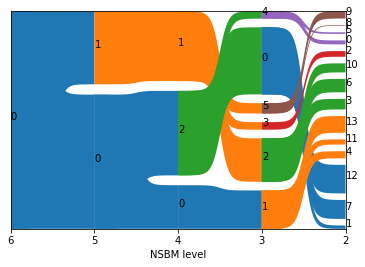

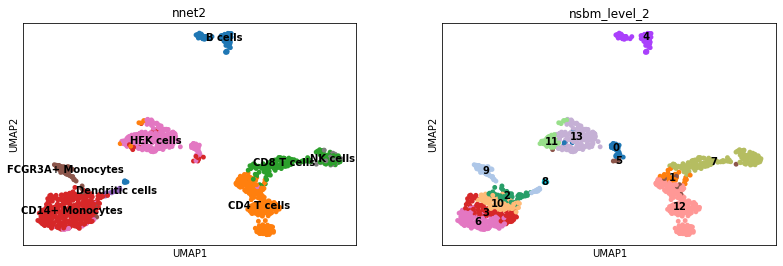

In [17]:
adatae3 = scnsbm.io.read('state_adata/Quartzseq_equilibrate3')
print('EQUILIBRATE Quartzseq3')
scnsbm.pl.alluvial(adatae3,level_end=6, level_start=2)
sc.pl.umap(adatae_Quartzseq3, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')

### gerarchia paga leiden vs gerarchia nsbm equilibrate

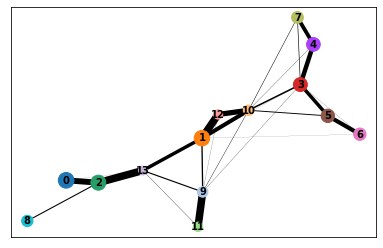

In [26]:
sc.tl.paga(adatae_Quartzseq, groups='leiden')
sc.pl.paga(adatae_Quartzseq, color=['leiden'])

In [27]:
import networkx as nx
G=nx.from_numpy_matrix(adatae_Quartzseq.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatae_Quartzseq.uns['paga']['connectivities'].todense().A1.reshape((14,14))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

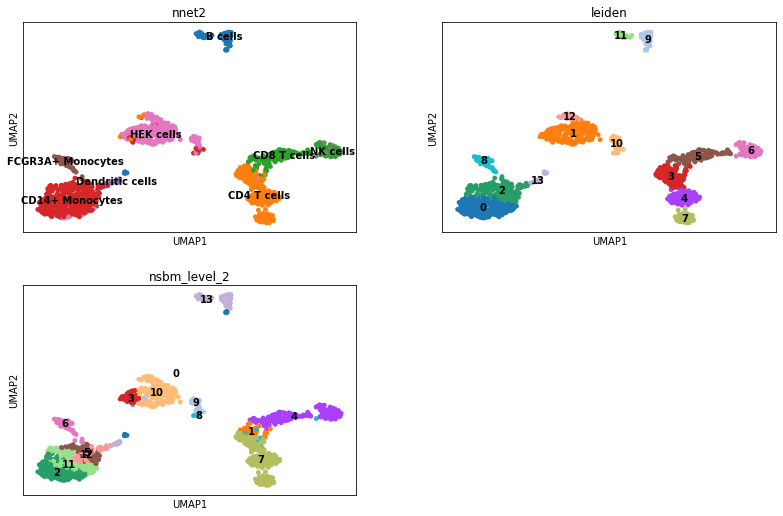

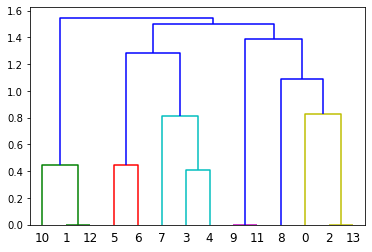

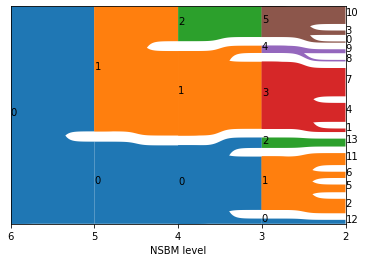

In [28]:
sc.tl.leiden(adatae_Quartzseq, resolution=1.0)
sc.pl.umap(adatae_Quartzseq, color=['nnet2', 'leiden', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatae_Quartzseq,level_end=6, level_start=2)

### gerarchia paga nsbm vs gerarchia nsbm equilibrate

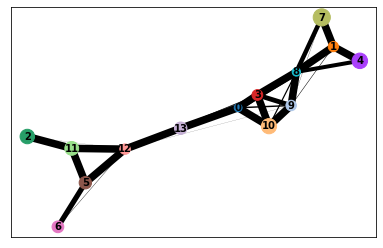

In [30]:
sc.tl.paga(adatae_Quartzseq, groups='nsbm_level_2')
sc.pl.paga(adatae_Quartzseq, color=['nsbm_level_2'])

In [31]:
import networkx as nx
G=nx.from_numpy_matrix(adatae_Quartzseq.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatae_Quartzseq.uns['paga']['connectivities'].todense().A1.reshape((14,14))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

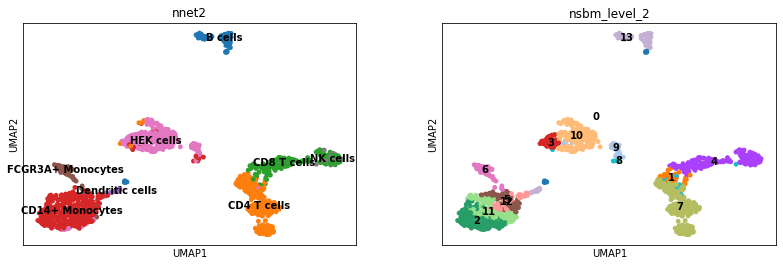

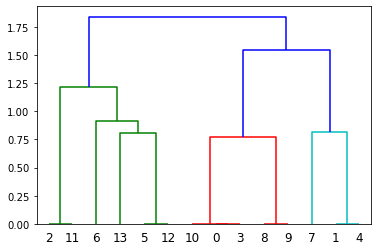

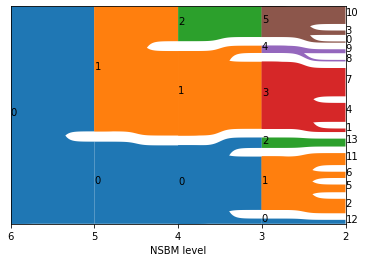

In [32]:
sc.tl.leiden(adatae_Quartzseq, resolution=1.0)
sc.pl.umap(adatae_Quartzseq, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatae_Quartzseq,level_end=6, level_start=2)

### gerarchia paga leiden vs gerarchia nsbm minimize

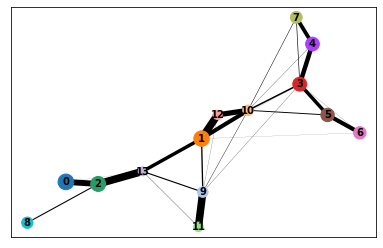

In [15]:
sc.tl.paga(adatam_Quartzseq2, groups='leiden')
sc.pl.paga(adatam_Quartzseq2, color=['leiden'])

In [10]:
import networkx as nx
G=nx.from_numpy_matrix(adatam_Quartzseq2.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatam_Quartzseq2.uns['paga']['connectivities'].todense().A1.reshape((14,14))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

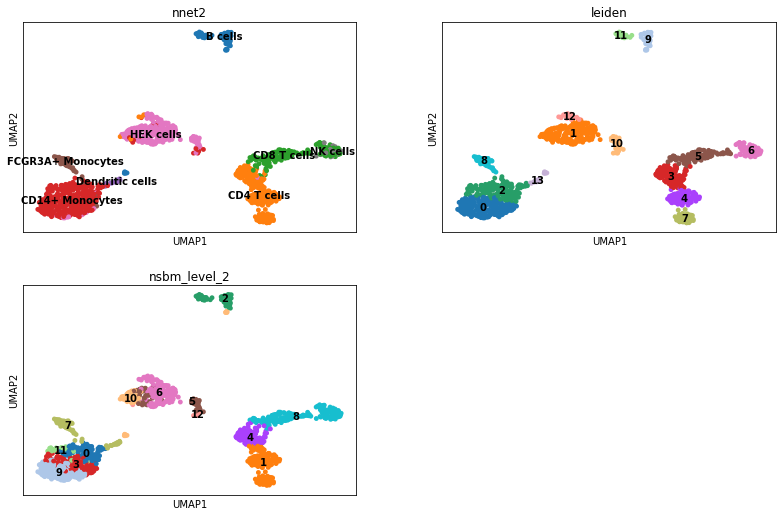

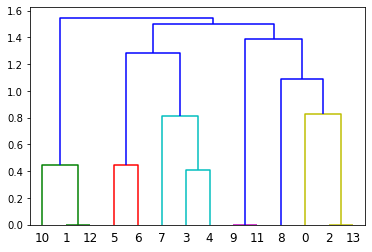

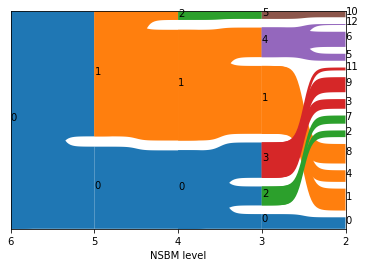

In [14]:
sc.tl.leiden(adatam_Quartzseq, resolution=1.0)
sc.pl.umap(adatam_Quartzseq, color=['nnet2', 'leiden', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatam_Quartzseq,level_end=6, level_start=2)

### gerarchia paga nsbm vs gerarchia nsbm minimize

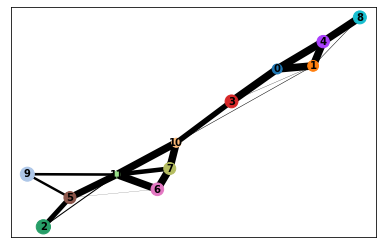

In [22]:
sc.tl.paga(adatam_Quartzseq2, groups='nsbm_level_2')
sc.pl.paga(adatam_Quartzseq2, color=['nsbm_level_2'])

In [24]:
import networkx as nx
G=nx.from_numpy_matrix(adatam_Quartzseq2.uns['paga']['connectivities_tree'].todense())
import scipy.cluster
M=adatam_Quartzseq2.uns['paga']['connectivities'].todense().A1.reshape((12,12))
Mc=scipy.spatial.distance.squareform(M)
cluster=scipy.cluster.hierarchy.ward(1-Mc)

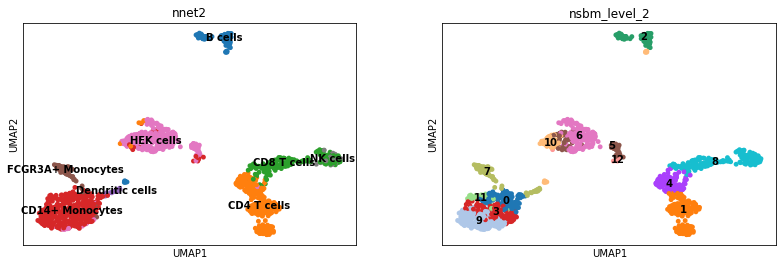

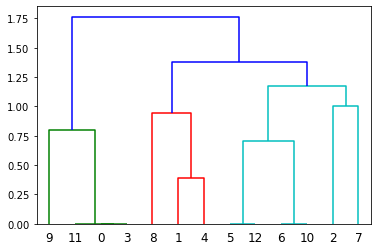

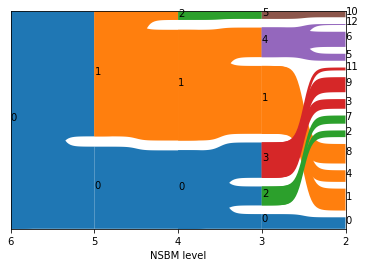

In [21]:
sc.tl.leiden(adatam_Quartzseq, resolution=1.0)
sc.pl.umap(adatam_Quartzseq, color=['nnet2', 'nsbm_level_2'], ncols=2, legend_loc='on data')
dendrogram=scipy.cluster.hierarchy.dendrogram(cluster)
scnsbm.pl.alluvial(adatam_Quartzseq,level_end=6, level_start=2)

ciò che si nota è che applicanto paga a nsbm, i risultati sono pessimi, peggiori della gerarchia nsbm; tuttavia con quartzseq se si applica paga a leiden, trova una gerarchia migliore di quella nsbm

### Minimize quartzseq

MINIMIZE Quartzseq


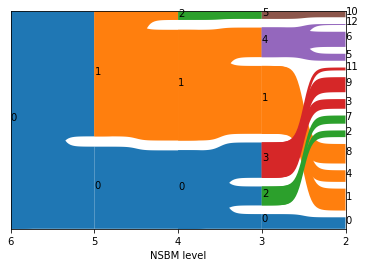

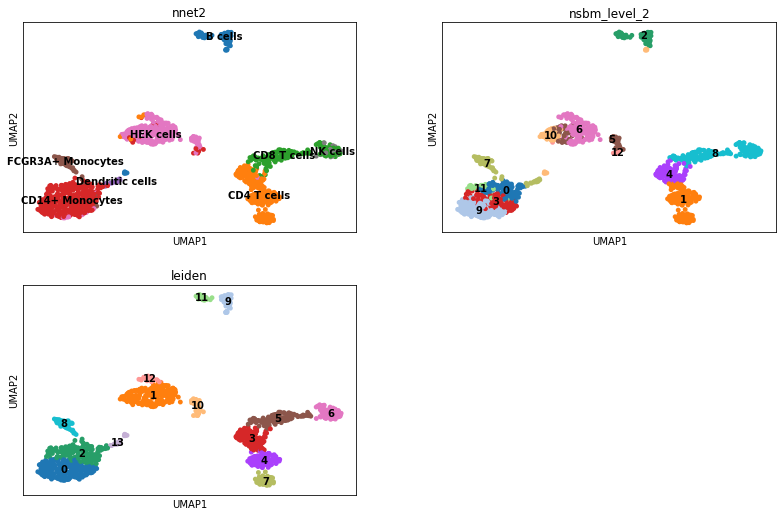

In [18]:
adatam = scnsbm.io.read('state_adata/Quartzseq_minimize')
print('MINIMIZE Quartzseq')
scnsbm.pl.alluvial(adatam,level_end=6, level_start=2)
sc.pl.umap(adatam_Quartzseq, color=['nnet2', 'nsbm_level_2','leiden'], ncols=2, legend_loc='on data')

MINIMIZE Quartzseq2


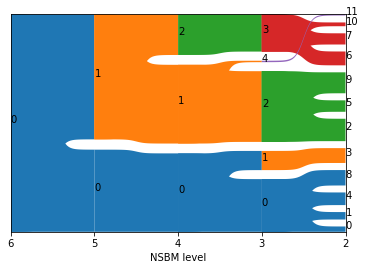

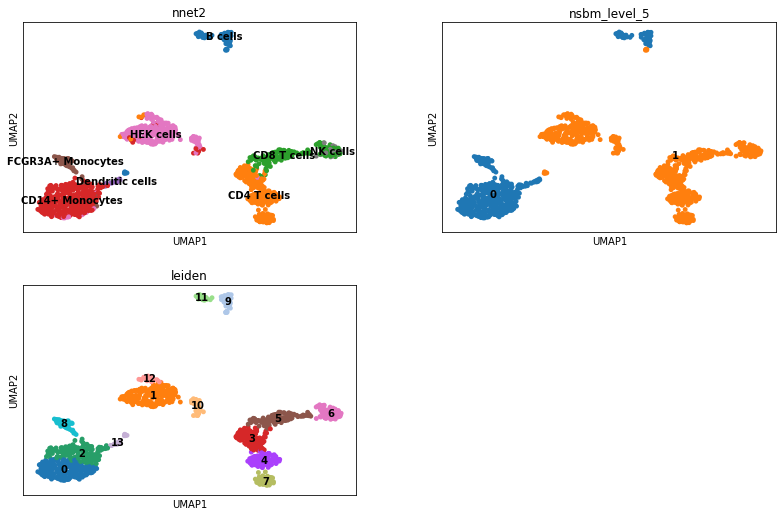

In [19]:
adatam2 = scnsbm.io.read('state_adata/Quartzseq_minimize2')
print('MINIMIZE Quartzseq2')
scnsbm.pl.alluvial(adatam2,level_end=6, level_start=2)
sc.pl.umap(adatam_Quartzseq2, color=['nnet2', 'nsbm_level_5','leiden'], ncols=2, legend_loc='on data')

MINIMIZE Quartzseq3


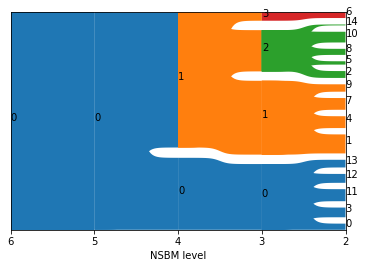

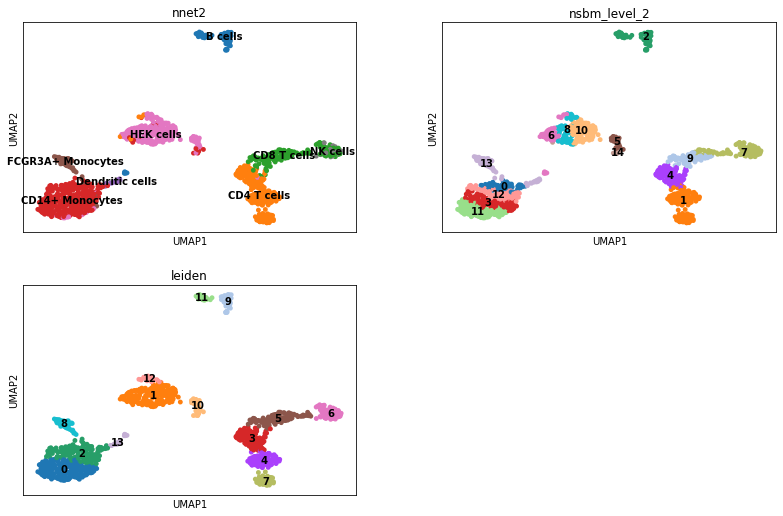

In [20]:
adatam3 = scnsbm.io.read('state_adata/Quartzseq_minimize3')
print('MINIMIZE Quartzseq3')
scnsbm.pl.alluvial(adatam3,level_end=6, level_start=2)
sc.pl.umap(adatam_Quartzseq3, color=['nnet2', 'nsbm_level_2','leiden'], ncols=2, legend_loc='on data')

##### b cell e megacariociti
##### tcell e hek
##### poi tutto insieme

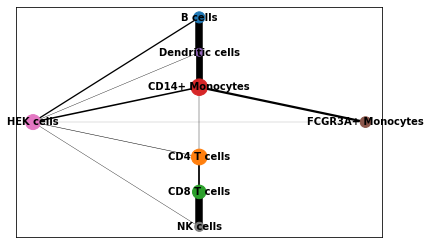

In [51]:
sc.tl.paga(adatam_Quartzseq,groups='nnet2')
sc.pl.paga(adatam_Quartzseq, color=['nnet2'], layout='eq_tree')

# marsseq
### Equilibrate

In [22]:
adatam_MARSseq=sc.read('state_adata/MARSseq_minimize.h5ad')
adatae_MARSseq=sc.read('state_adata/MARSseq_equilibrate.h5ad')

EQUILIBRATE MARSseq


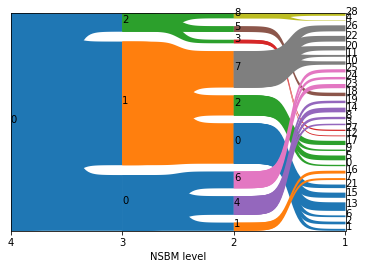

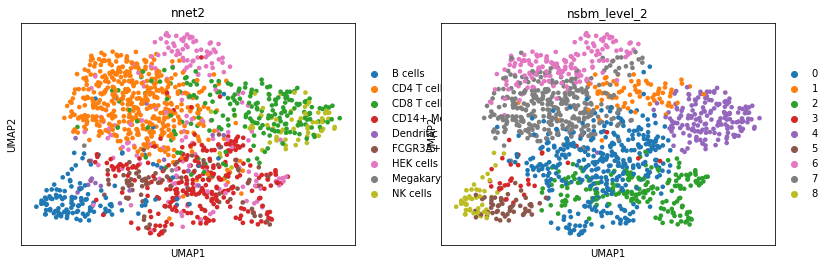

In [23]:
adatae = scnsbm.io.read('state_adata/MARSseq_equilibrate')
print('EQUILIBRATE MARSseq')
scnsbm.pl.alluvial(adatae,level_end=4, level_start=1)
sc.pl.umap(adatae_MARSseq, color=['nnet2', 'nsbm_level_2'], ncols=2)

In [24]:
adatam_MARSseq2=sc.read('state_adata/MARSseq_minimize2.h5ad')
adatae_MARSseq2=sc.read('state_adata/MARSseq_equilibrate2.h5ad')

EQUILIBRATE MARSseq2


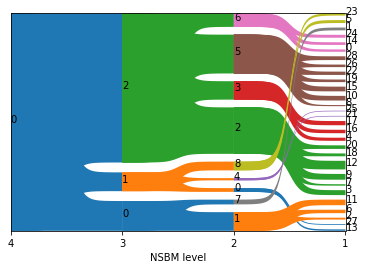

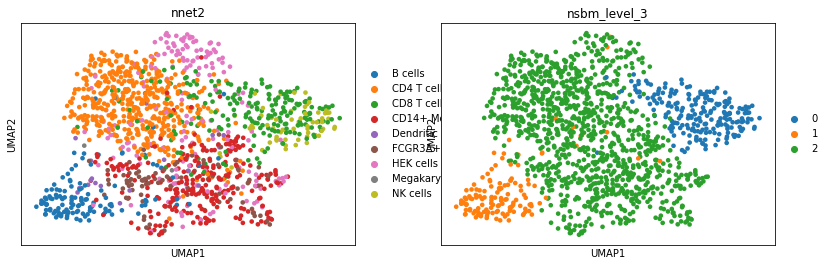

In [25]:
adatae2 = scnsbm.io.read('state_adata/MARSseq_equilibrate2')
print('EQUILIBRATE MARSseq2')
scnsbm.pl.alluvial(adatae2,level_end=4, level_start=1)
sc.pl.umap(adatae_MARSseq2, color=['nnet2', 'nsbm_level_3'], ncols=2)

Trying to set attribute `.uns` of view, copying.


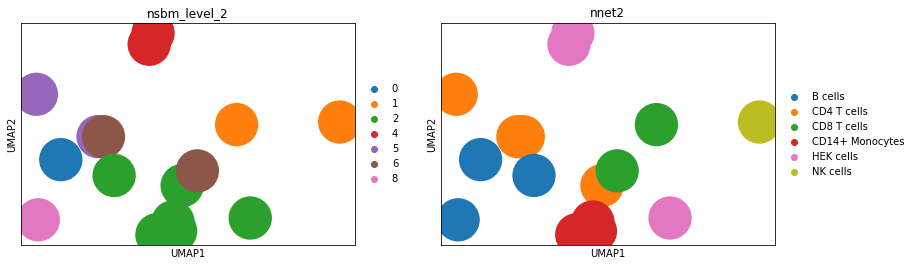

In [26]:
M=adatae_MARSseq2.uns['nsbm']['cell_affinity']['2']
adatae_MARSseq2.obs['max_u'] = 1 - np.max(M, axis=1)
sc.pl.umap(adatae_MARSseq2[adatae_MARSseq2.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

In [27]:
adatam_MARSseq3=sc.read('state_adata/MARSseq_minimize3.h5ad')
adatae_MARSseq3=sc.read('state_adata/MARSseq_equilibrate3.h5ad')

EQUILIBRATE MARSseq3


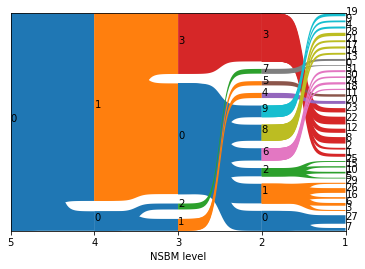

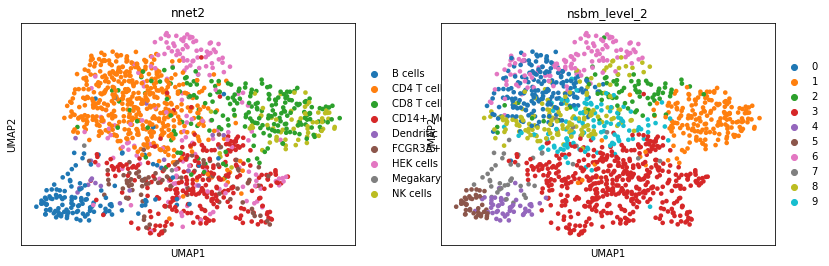

In [28]:
adatae3 = scnsbm.io.read('state_adata/MARSseq_equilibrate3')
print('EQUILIBRATE MARSseq3')
scnsbm.pl.alluvial(adatae3,level_end=5, level_start=1)
sc.pl.umap(adatae_MARSseq3, color=['nnet2', 'nsbm_level_2'], ncols=2)

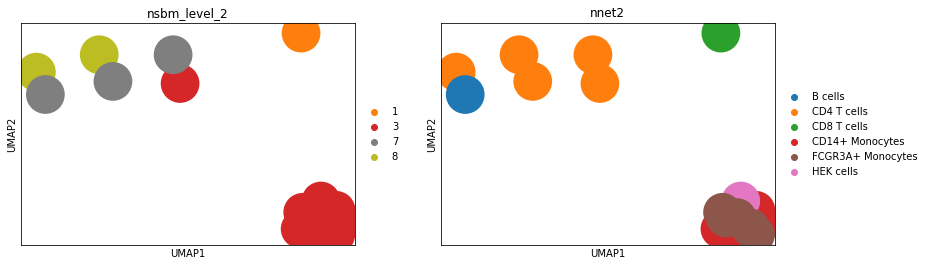

In [29]:
M=adatae_MARSseq3.uns['nsbm']['cell_affinity']['2']
adatae_MARSseq3.obs['max_u'] = 1 - np.max(M, axis=1)
sc.pl.umap(adatae_MARSseq3[adatae_MARSseq3.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

### minimize

MINIMIZE MARSseq


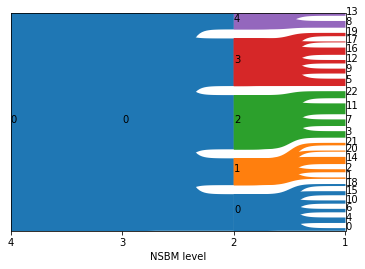

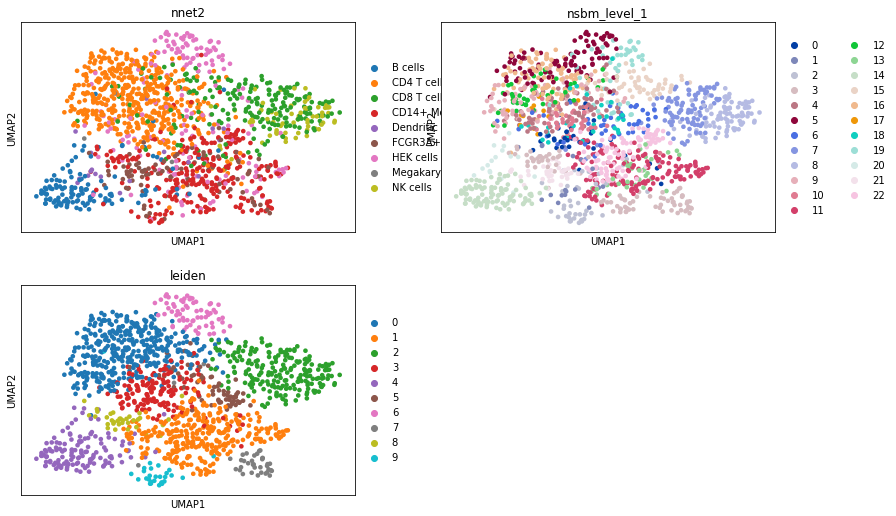

In [30]:
adatam = scnsbm.io.read('state_adata/MARSseq_minimize')
print('MINIMIZE MARSseq')
scnsbm.pl.alluvial(adatam,level_end=4, level_start=1)
sc.pl.umap(adatam_MARSseq, color=['nnet2', 'nsbm_level_1','leiden'], ncols=2)

MINIMIZE MARSseq2


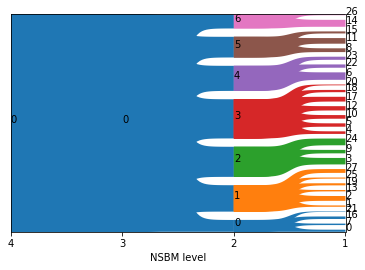

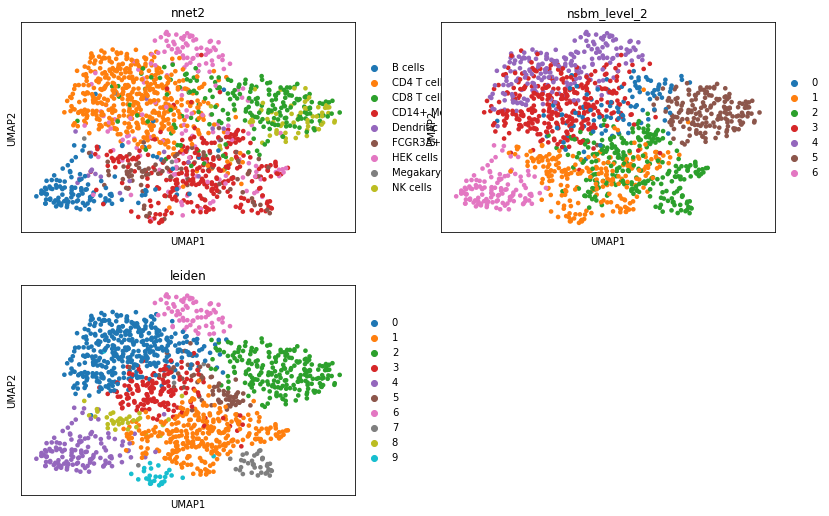

In [31]:
adatam2 = scnsbm.io.read('state_adata/MARSseq_minimize2')
print('MINIMIZE MARSseq2')
scnsbm.pl.alluvial(adatam2,level_end=4, level_start=1)
sc.pl.umap(adatam_MARSseq2, color=['nnet2', 'nsbm_level_2','leiden'], ncols=2)

In [32]:
M=adatam_MARSseq2.uns['nsbm']['cell_affinity']['2']
adatam_MARSseq2.obs['max_u'] = 1 - np.max(M, axis=1) 

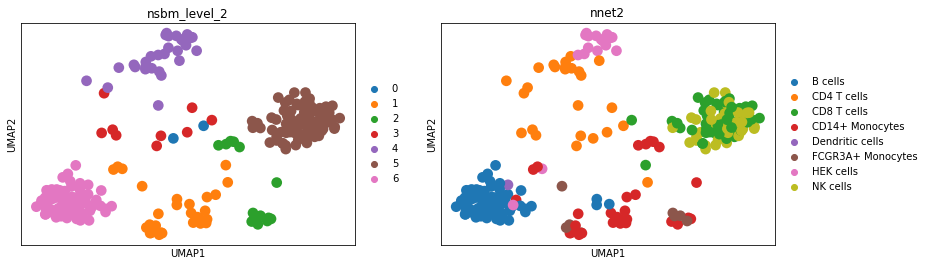

In [33]:
sc.pl.umap(adatam_MARSseq2[adatam_MARSseq2.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

MINIMIZE MARSseq3


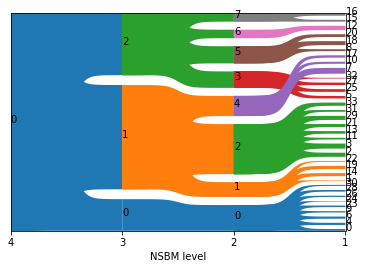

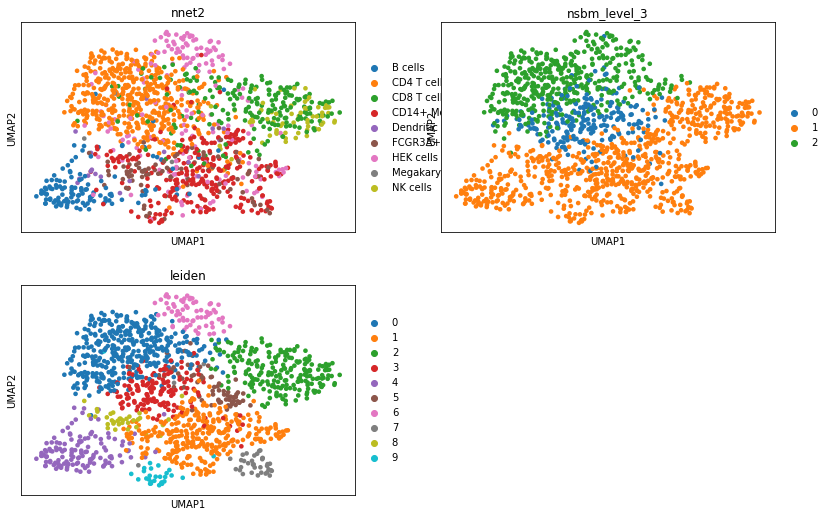

In [34]:
adatam3 = scnsbm.io.read('state_adata/MARSseq_minimize3')
print('MINIMIZE MARSseq3')
scnsbm.pl.alluvial(adatam3,level_end=4, level_start=1)
sc.pl.umap(adatam_MARSseq3, color=['nnet2', 'nsbm_level_3','leiden'], ncols=2)

Trying to set attribute `.uns` of view, copying.


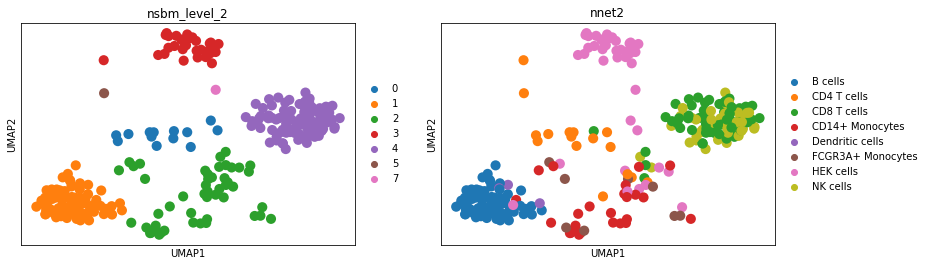

In [35]:
M=adatam_MARSseq3.uns['nsbm']['cell_affinity']['2']
adatam_MARSseq3.obs['max_u'] = 1 - np.max(M, axis=1)
sc.pl.umap(adatam_MARSseq3[adatam_MARSseq3.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

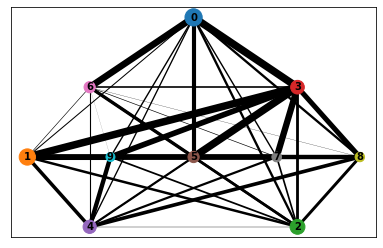

In [36]:
sc.tl.paga(adatam_MARSseq,groups='leiden')
sc.pl.paga(adatam_MARSseq, color=['leiden'], layout='eq_tree')

# icell8
### equilibrate

In [37]:
adatam_iCELL8=sc.read('state_adata/iCELL8_minimize.h5ad')
adatae_iCELL8=sc.read('state_adata/iCELL8_equilibrate.h5ad')

EQUILIBRATE iCELL8


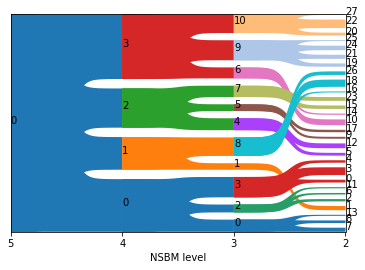

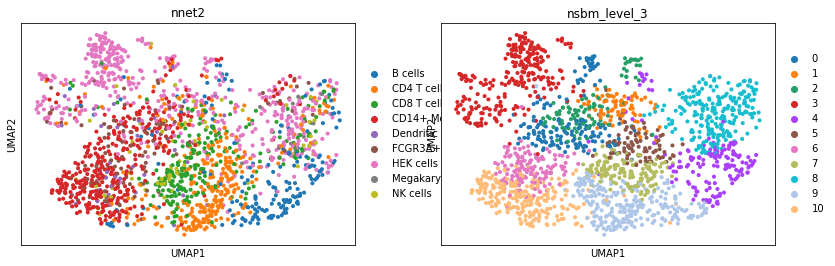

In [38]:
adatae = scnsbm.io.read('state_adata/iCELL8_equilibrate')
print('EQUILIBRATE iCELL8')
scnsbm.pl.alluvial(adatae,level_end=5, level_start=2)
sc.pl.umap(adatae_iCELL8, color=['nnet2', 'nsbm_level_3'], ncols=2)

In [39]:
adatam_iCELL82=sc.read('state_adata/iCELL8_minimize2.h5ad')
adatae_iCELL82=sc.read('state_adata/iCELL8_equilibrate2.h5ad')

EQUILIBRATE iCELL82


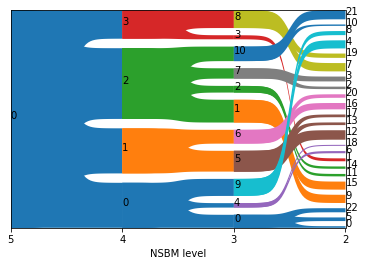

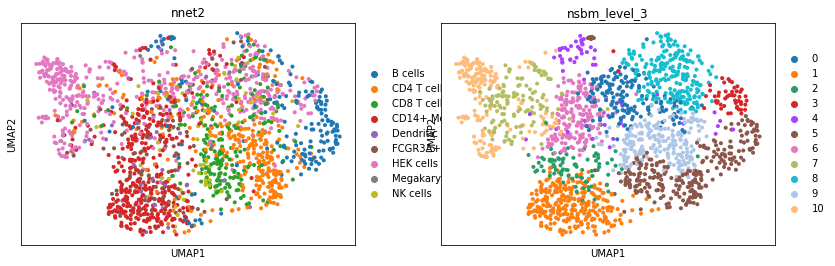

In [40]:
adatae2 = scnsbm.io.read('state_adata/iCELL8_equilibrate2')
print('EQUILIBRATE iCELL82')
scnsbm.pl.alluvial(adatae2,level_end=5, level_start=2)
sc.pl.umap(adatae_iCELL82, color=['nnet2', 'nsbm_level_3'], ncols=2)

Trying to set attribute `.uns` of view, copying.


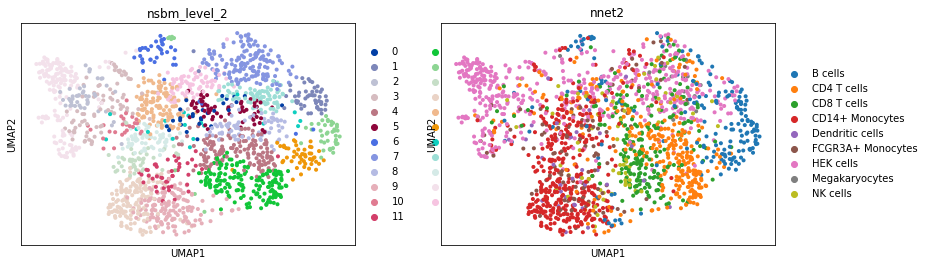

In [41]:
M=adatae_iCELL82.uns['nsbm']['cell_affinity']['5']
adatae_iCELL82.obs['max_u'] = 1 - np.max(M, axis=1)
sc.pl.umap(adatae_iCELL82[adatae_iCELL82.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

In [42]:
adatam_iCELL83=sc.read('state_adata/iCELL8_minimize3.h5ad')
adatae_iCELL83=sc.read('state_adata/iCELL8_equilibrate3.h5ad')

EQUILIBRATE iCELL83


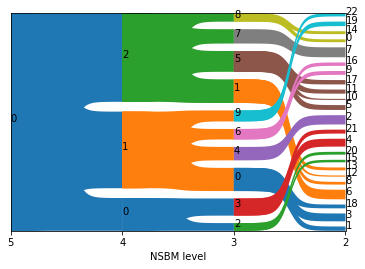

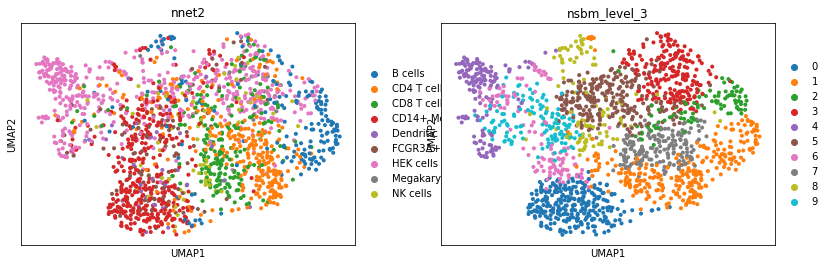

In [43]:
adatae3 = scnsbm.io.read('state_adata/iCELL8_equilibrate3')
print('EQUILIBRATE iCELL83')
scnsbm.pl.alluvial(adatae3,level_end=5, level_start=2)
sc.pl.umap(adatae_iCELL83, color=['nnet2', 'nsbm_level_3'], ncols=2)

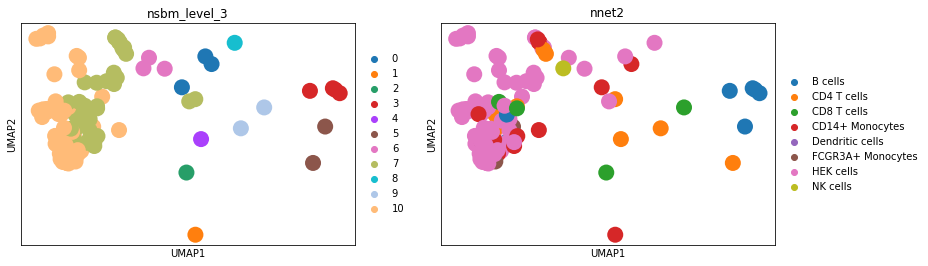

In [44]:
M=adatae_iCELL82.uns['nsbm']['cell_affinity']['4']
adatae_iCELL82.obs['max_u'] = 1 - np.max(M, axis=1)
sc.pl.umap(adatae_iCELL82[adatae_iCELL82.obs.max_u < 1e-100], color=['nsbm_level_3','nnet2'])

### minimize

MINIMIZE iCELL8


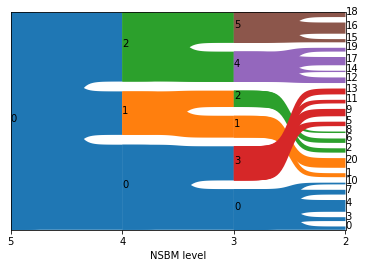

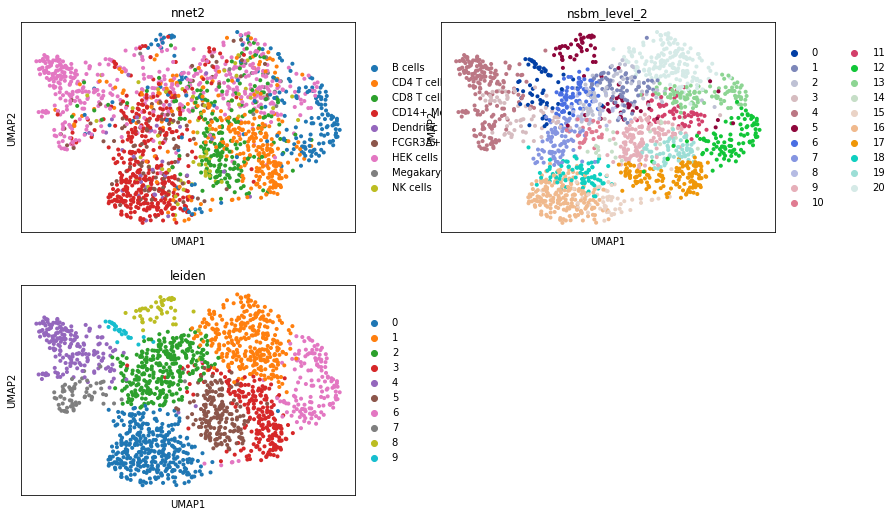

In [45]:
adatam = scnsbm.io.read('state_adata/iCELL8_minimize')
print('MINIMIZE iCELL8')
scnsbm.pl.alluvial(adatam,level_end=5, level_start=2)
sc.pl.umap(adatam_iCELL8, color=['nnet2', 'nsbm_level_2','leiden'], ncols=2)

MINIMIZE iCELL82


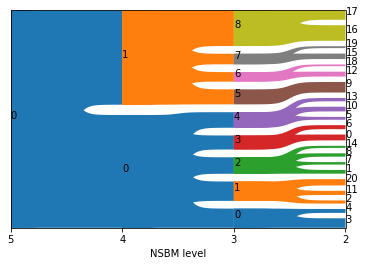

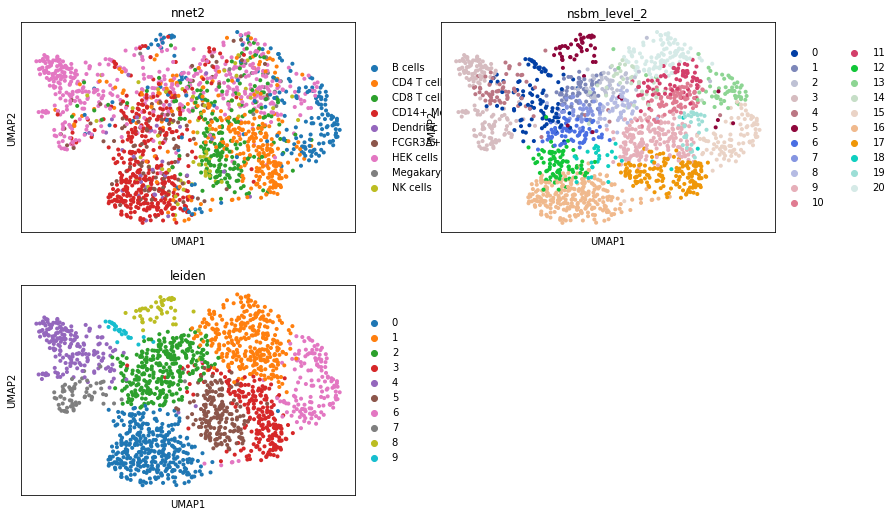

In [46]:
adatam = scnsbm.io.read('state_adata/iCELL8_minimize2')
print('MINIMIZE iCELL82')
scnsbm.pl.alluvial(adatam,level_end=5, level_start=2)
sc.pl.umap(adatam_iCELL82, color=['nnet2', 'nsbm_level_2','leiden'], ncols=2)

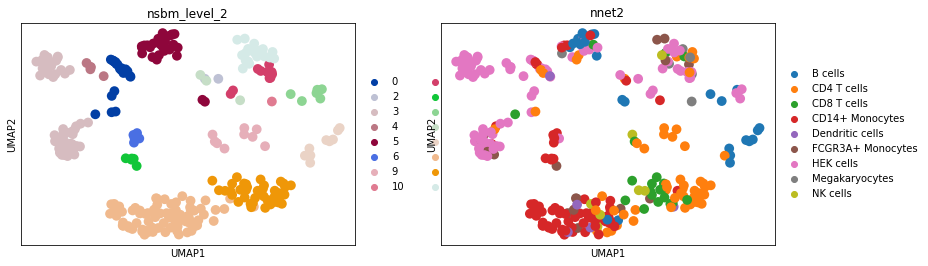

In [47]:
M=adatam_iCELL82.uns['nsbm']['cell_affinity']['3']
adatam_iCELL82.obs['max_u'] = 1 - np.max(M, axis=1)
sc.pl.umap(adatam_iCELL82[adatam_iCELL82.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])

MINIMIZE iCELL83


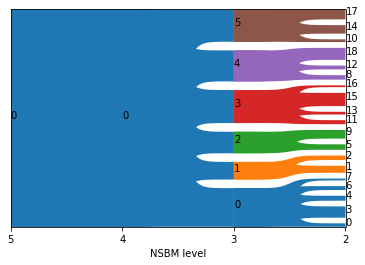

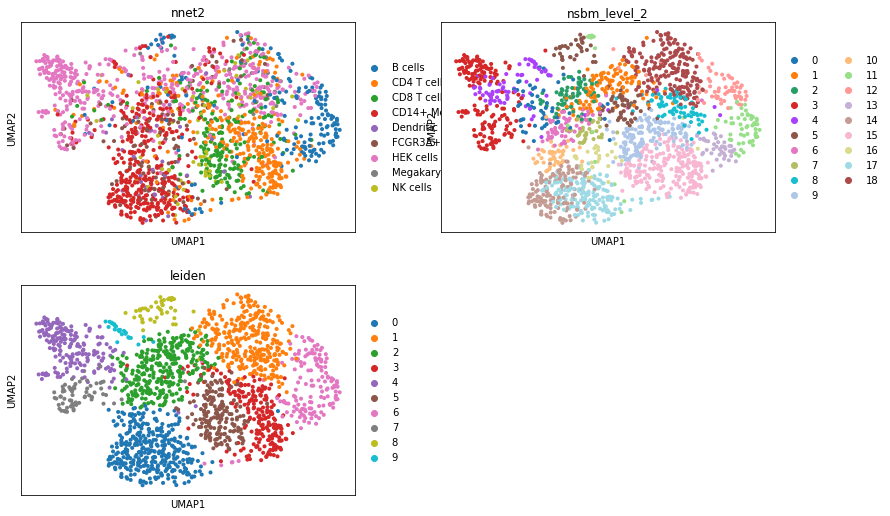

In [48]:
adatam = scnsbm.io.read('state_adata/iCELL8_minimize3')
print('MINIMIZE iCELL83')
scnsbm.pl.alluvial(adatam,level_end=5, level_start=2)
sc.pl.umap(adatam_iCELL83, color=['nnet2', 'nsbm_level_2','leiden'], ncols=2)

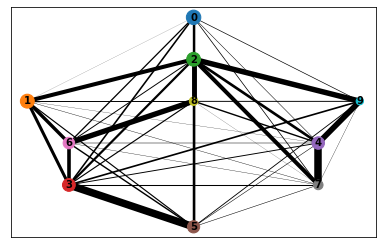

In [49]:
sc.tl.paga(adatam_iCELL83,groups='leiden')
sc.pl.paga(adatam_iCELL83, color=['leiden'], layout='eq_tree')

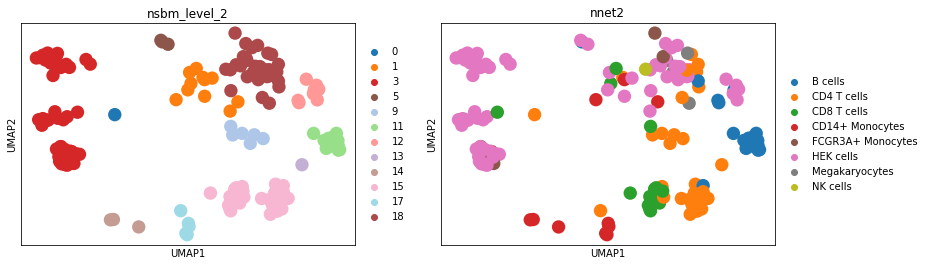

In [50]:
M=adatam_iCELL83.uns['nsbm']['cell_affinity']['2']
adatam_iCELL83.obs['max_u'] = 1 - np.max(M, axis=1)
sc.pl.umap(adatam_iCELL83[adatam_iCELL83.obs.max_u < 1e-100], color=['nsbm_level_2','nnet2'])